In [1]:
import pandas as pd
from pyzotero import zotero
from habanero import Crossref
import habanero as hb
import matplotlib.pyplot as plt
import seaborn as sns
from scholar import scholar

In [2]:
zot = zotero.Zotero(2419050, 'group', 'g0wIgs8ovYoLF0oLtFXvqT9a')
cr = Crossref()
our_coll = 'SocialRobotEdu'
our_coll_key = 'X6PKYLT6'

In [3]:
# fetch the zotero collection
subColl = zot.collections_sub(our_coll_key)

In [4]:
# parse all the items of the collection into a dataframe
df = pd.DataFrame()
for sc in subColl:
    items = zot.collection_items(sc['key'])
    for i in range(len(items)):
        data = items[i]['data']
        data.update({'wtype':sc['data']['name']})
        df = df.append(data, ignore_index=True)    
df.head()

,DOI,ISSN,abstractNote,accessDate,archive,archiveLocation,callNumber,collections,creators,date,...,numPages,note,parentItem,websiteTitle,websiteType,meetingName,presentationType,charset,contentType,linkMode
0,,2340-1079,"For a long time now, people have dreamed of cr...",2020-03-31T02:05:50Z,,,,[E9ILFJBI],"[{'creatorType': 'author', 'firstName': 'P.', ...",2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2340-1079,Robots are currently entering the classrooms i...,2020-03-31T02:05:08Z,,,,[E9ILFJBI],"[{'creatorType': 'author', 'firstName': 'S.', ...",2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.21125/inted.2020.1926,2340-1079,We report on a follow-up study of the Co-Write...,2020-03-30T00:08:16Z,,,,[E9ILFJBI],"[{'creatorType': 'author', 'firstName': 'C.', ...",2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.3389/frobt.2020.00015,2296-9144,The emergence and development of cognitive str...,2020-03-26T02:35:50Z,,,,[E9ILFJBI],"[{'creatorType': 'author', 'firstName': 'Vicky...",2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.3389/frobt.2019.00148,2296-9144,Acknowledging the benefits of active learning ...,2020-03-26T02:34:47Z,,,,[E9ILFJBI],"[{'creatorType': 'author', 'firstName': 'Rinat...",2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Remove subfolder containing other review papers
df = df[df.wtype != 'Other_Related_Reviews']
df.head()

,DOI,ISSN,abstractNote,accessDate,archive,archiveLocation,callNumber,collections,creators,date,...,numPages,note,parentItem,websiteTitle,websiteType,meetingName,presentationType,charset,contentType,linkMode
0,,2340-1079,"For a long time now, people have dreamed of cr...",2020-03-31T02:05:50Z,,,,[E9ILFJBI],"[{'creatorType': 'author', 'firstName': 'P.', ...",2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2340-1079,Robots are currently entering the classrooms i...,2020-03-31T02:05:08Z,,,,[E9ILFJBI],"[{'creatorType': 'author', 'firstName': 'S.', ...",2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.21125/inted.2020.1926,2340-1079,We report on a follow-up study of the Co-Write...,2020-03-30T00:08:16Z,,,,[E9ILFJBI],"[{'creatorType': 'author', 'firstName': 'C.', ...",2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.3389/frobt.2020.00015,2296-9144,The emergence and development of cognitive str...,2020-03-26T02:35:50Z,,,,[E9ILFJBI],"[{'creatorType': 'author', 'firstName': 'Vicky...",2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.3389/frobt.2019.00148,2296-9144,Acknowledging the benefits of active learning ...,2020-03-26T02:34:47Z,,,,[E9ILFJBI],"[{'creatorType': 'author', 'firstName': 'Rinat...",2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['DOI', 'ISSN', 'abstractNote', 'accessDate', 'archive',
       'archiveLocation', 'callNumber', 'collections', 'creators', 'date',
       'dateAdded', 'dateModified', 'extra', 'issue', 'itemType',
       'journalAbbreviation', 'key', 'language', 'libraryCatalog', 'pages',
       'publicationTitle', 'relations', 'rights', 'series', 'seriesText',
       'seriesTitle', 'shortTitle', 'tags', 'title', 'url', 'version',
       'volume', 'wtype', 'ISBN', 'conferenceName', 'place',
       'proceedingsTitle', 'publisher', 'bookTitle', 'edition',
       'numberOfVolumes', 'seriesNumber', 'numPages', 'note', 'parentItem',
       'websiteTitle', 'websiteType', 'meetingName', 'presentationType',
       'charset', 'contentType', 'linkMode'],
      dtype='object')

In [7]:
list(range(2009,2020, 1))

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

# Number of papers per year

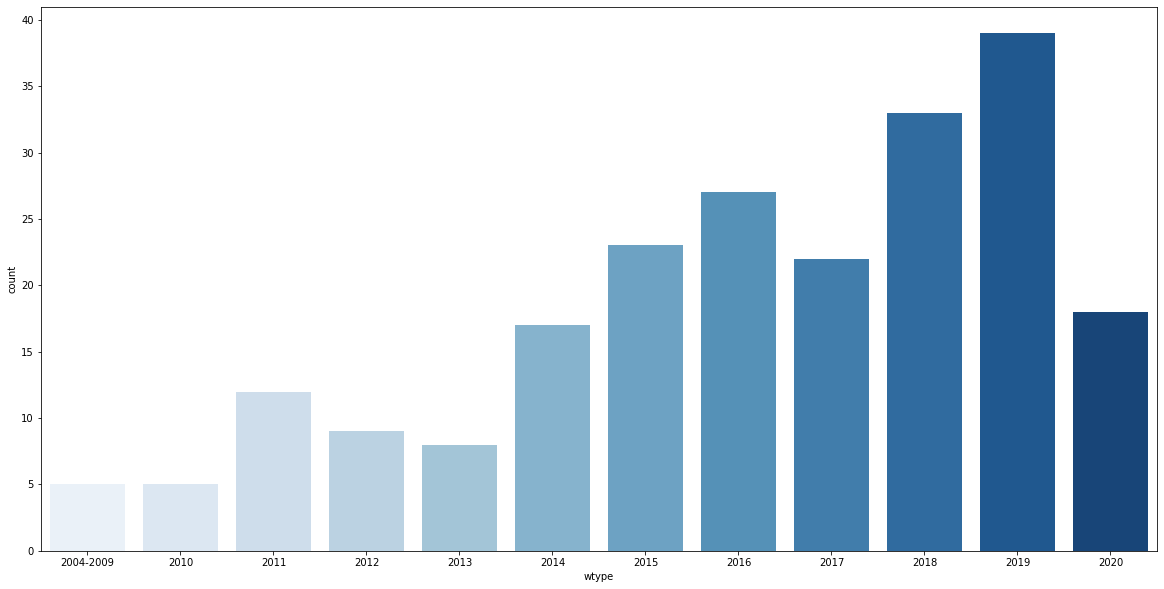

In [8]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="wtype", data=df, order=['2004-2009','2010', '2011', '2012', '2013', '2014', 
                                              '2015', '2016', '2017', '2018', '2019', '2020'], palette='Blues')

# Parse data from crossref using DOI


In [9]:
cr_df = pd.DataFrame()
for p in range(len(df)): 
    

    if(df.at[p,'DOI'] !='' and df.at[p,'DOI'] !='nan'):
        try:
            jsdata = cr.works(ids=[df.at[p,'DOI']])
        except:
            print(df.at[p,'title'], df.at[p,'DOI'])
            print("Query failed")
            r = dict(df.loc[p])
            cr_df = cr_df.append(r, ignore_index = True)
            continue
        
        if (jsdata['status'] == 'ok'):
            r = dict(df.loc[p])
            r.update(jsdata['message'])
            r['citation_count'] =  hb.counts.citation_count(doi =df.at[p,'DOI'])
            cr_df = cr_df.append(r, ignore_index = True)

        
        
    else:
        print(df.loc[p])

DOI                                                                     
ISSN                                                           2340-1079
abstractNote           For a long time now, people have dreamed of cr...
accessDate                                          2020-03-31T02:05:50Z
archive                                                                 
archiveLocation                                                         
callNumber                                                              
collections                                                   [E9ILFJBI]
creators               [{'creatorType': 'author', 'firstName': 'P.', ...
date                                                                2020
dateAdded                                           2020-03-31T02:05:50Z
dateModified                                        2020-03-31T02:05:50Z
extra                                                                   
issue                                              

In [24]:
cr_df

,DOI,ISBN,ISSN,URL,abstractNote,accessDate,archive,archiveLocation,author,bookTitle,...,published-online,reference,update-policy,publisher-location,abstract,journal-issue,page,subject,assertion,article-number
0,10.21125/inted.2020.1926,[9788409179398],2340-1079,http://dx.doi.org/10.21125/inted.2020.1926,We report on a follow-up study of the Co-Write...,2020-03-30T00:08:16Z,,,"[{'given': 'Christia', 'family': 'Ioannou', 's...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.3389/frobt.2020.00015,NaN,[2296-9144],http://dx.doi.org/10.3389/frobt.2020.00015,The emergence and development of cognitive str...,2020-03-26T02:35:50Z,,,"[{'given': 'Vicky', 'family': 'Charisi', 'sequ...",NaN,...,"{'date-parts': [[2020, 2, 18]]}","[{'key': 'B1', 'author': 'Alves-Oliveira', 'fi...",http://dx.doi.org/10.3389/crossmark-policy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.3389/frobt.2019.00148,NaN,[2296-9144],http://dx.doi.org/10.3389/frobt.2019.00148,Acknowledging the benefits of active learning ...,2020-03-26T02:34:47Z,,,"[{'given': 'Rinat B.', 'family': 'Rosenberg-Ki...",NaN,...,"{'date-parts': [[2020, 1, 10]]}","[{'key': 'B1', 'doi-asserted-by': 'publisher',...",http://dx.doi.org/10.3389/crossmark-policy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.1145/3319502.3374822,[9781450367462],NaN,http://dx.doi.org/10.1145/3319502.3374822,Prior work in affect-aware educational robots ...,2020-03-16,,,"[{'given': 'Huili', 'family': 'Chen', 'sequenc...",NaN,...,"{'date-parts': [[2020, 3, 9]]}","[{'key': 'e_1_3_2_1_1_1', 'unstructured': 'Ton...",NaN,"New York, NY, USA",NaN,NaN,NaN,NaN,NaN,NaN
4,10.1145/3319502.3374803,[9781450367462],NaN,http://dx.doi.org/10.1145/3319502.3374803,"Interactive learning technologies, such as rob...",2020-03-16,,,"[{'given': 'Daniel P.', 'family': 'Davison', '...",NaN,...,"{'date-parts': [[2020, 3, 9]]}","[{'key': 'e_1_3_2_1_1_1', 'author': 'Baxter P....",NaN,"New York, NY, USA",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,10.1109/icalt.2006.1652373,[0769526322],NaN,http://dx.doi.org/10.1109/icalt.2006.1652373,Advancement in robotic research enables robot ...,,,,"[{'family': 'Zhen-Jia You', 'sequence': 'first...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,10.1109/roman.2008.4600664,[9781424422128],NaN,http://dx.doi.org/10.1109/roman.2008.4600664,This research explores feasibility of using in...,,,,"[{'family': 'Eun-ja Hyun', 'sequence': 'first'...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,10.1007/978-3-642-03986-7_24,"[9783642039850, 9783642039867]","[1865-0929, 1865-0937]",http://dx.doi.org/10.1007/978-3-642-03986-7_24,This paper discusses the role of robots in rem...,,,,"[{'given': 'Akihiro', 'family': 'Yorita', 'seq...",NaN,...,NaN,"[{'key': '24_CR1', 'unstructured': 'Unesco, Op...",NaN,"Berlin, Heidelberg",NaN,NaN,204-213,NaN,NaN,NaN
214,10.3745/jips.2008.4.4.159,NaN,[1976-913X],http://dx.doi.org/10.3745/jips.2008.4.4.159,Comparative Study on the Educational Use of Ho...,2020-02-27T01:46:55Z,,,"[{'given': 'Jeong-Hye', 'family': 'Han', 'sequ...",NaN,...,NaN,NaN,NaN,NaN,NaN,"{'published-print': {'date-parts': [[2008, 12,...",159-168,NaN,NaN,NaN


In [10]:
cr_df.drop(['rights','accessDate','archive','archiveLocation','callNumber','charset','content-domain'
            ,'contentType', 'dateAdded','dateModified','edition','funder','language','linkMode',
           'meetingName','note','numberOfVolumes','original-title','presentationType',
           'score','seriesNumber','seriesText','seriesTitle','short-title'], axis=1, inplace =True)

In [11]:
cr_df.to_csv('CrossRef_DataFrame.csv', index=False)

# Merge CrossRef with Belpaeme et al 

In [10]:
belpaeme2018 = pd.read_excel('Update Meta analysis of robots for learning literature (Science Robotics).xlsx', index = False)
belpaeme2018

,ID,DOI,Paper,Country,Comparison,Robot vs human/screen/alternative,Robot/s used (?),Design,Cognitive/Affective,Reported effect size,...,Coded by,Curriculum,Location,Context\n,nb students per robot,Communicative gestures vs functional actions,Autonomy,Contain Retain component?,Material,Updated by
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,(M) Manual (T) Teleoperation (AssT)Assisted Te...,NaN,NaN,NaN
1,1.0,10.1007/978-3-642-34103-8_41,"Abildgaard JR, Scharfe H (2012)",Denmark,male vs female perception,NaN,Geminoid-DK,"1 condition, 2 groups, between subjects",affective (robot perception),not reported,...,JK,HCI,university,University classroom,150.0,CO,T,NaN,Laptop,WJ
2,2.0,10.1142/S0219843614500224,"Alemi M, Meghdari A, Ghazisaedy M (2014)",Iran,robot + human vs just human,robot vs human,Nao,between subjects,cognitive (learning),0.3 (eta squared),...,JK,L2,school,junior High,15.0,CO,Scripted,NaN,-,WJ
3,3.0,10.1109/ICRoM.2014.6990994,"Alemi M, Meghdari A, Basiri NM, Taheri A (2015)",Iran,pre vs mid vs post vs delayed post test of lea...,NaN,Nao,no condition comparison,cognitive (learning),not reported,...,JK,L2,school,junior High,15.0,CO,Scripted,NaN,-,WJ
4,4.0,10.1007/s12369-015-0286-y,"Alemi M, Meghdari A, Ghazisaedy M (2015)",Iran,robot + human vs just human,robot vs human,Nao,"2 conditions, between subjects",affective (anxiety),not reported,...,JK,L2,school,junior High,15.0,CO,Scripted,NaN,-,WJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,110.0,10.1007/978-3-319-42975-5_23,"de Haas, Smeekens, Njeri, Haselager, et al (2016)",Netherlands,levels of socially complex robot interactions ...,NaN,Nao,"4 conditions, between subjects",affective (emotion),NaN,...,EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,NaN,NaN,NaN,NaN,levels of socially complex robot interactions ...,NaN,Nao,"4 conditions, between subjects",affective (arousal),NaN,...,EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308,111.0,10.1109/MRA.2016.2546700,"Lemaignan, Jacq, Hood, Garcia, Paiva, Dillenbo...",Switzerland,no robot manipulation,NaN,Nao,no condition comparison,NaN,NaN,...,EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309,112.0,10.1109/CEC.2016.7743956,"Suzuki, Yamada, Kanoh (2016)",Japan,nodding+hinting robot vs hinting only robot vs...,NaN,ifbot,2 conditions (but includes previous study data...,cognitive (task completion),NaN,...,EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
belpaeme2018.dropna(subset=['DOI'], inplace=True) # remove papers without DOI
belpaeme2018.reset_index(inplace=True)

In [14]:
cr_anno = pd.merge(cr_df, belpaeme2018, on=['DOI'], how='left')

In [15]:
cr_anno.to_excel('CrossRef_DataFrame_wAnno.xlsx', index=False)

# Number of citation per publication year

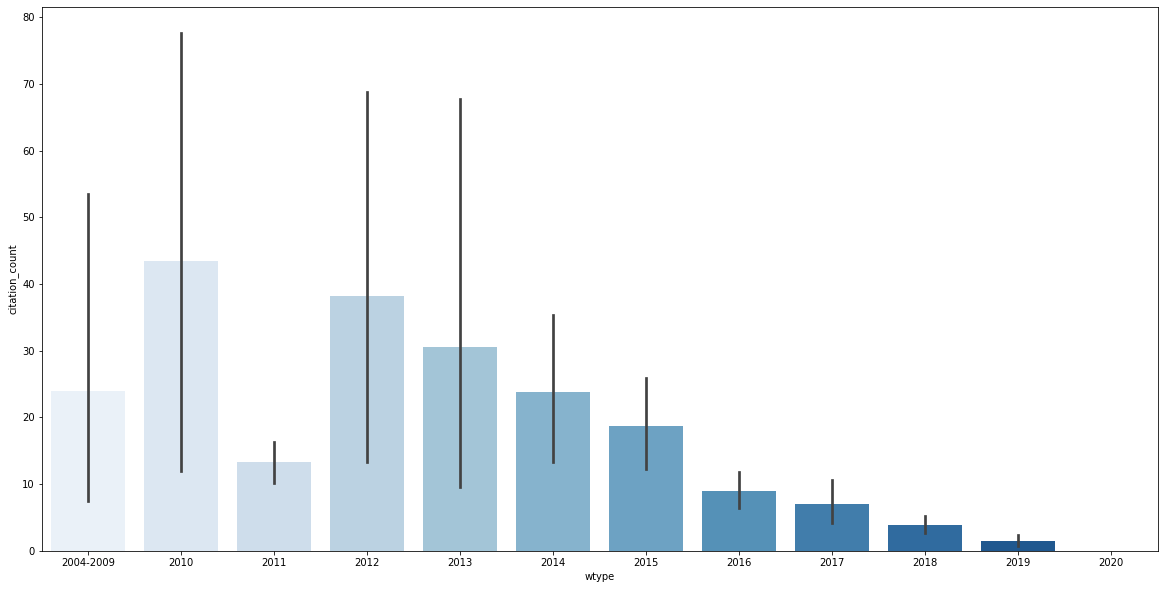

In [16]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x="wtype",y='citation_count', data=cr_anno, order=['2004-2009','2010', '2011', '2012', '2013', '2014', 
                                              '2015', '2016', '2017', '2018', '2019', '2020'], palette='Blues')

In [17]:
cr_anno['is-referenced-by-count'].fillna(0, inplace=True)
cr_anno.sort_values(by='is-referenced-by-count', inplace = True)

primar = cr_anno.tail(10)[['DOI','URL',
       'proceedingsTitle', 'publicationTitle', 'published-online',
       'published-print', 'publisher', 'publisher-location', 'reference','author', 'bookTitle', 'citation_count', 'collections',
       'conferenceName']]

In [44]:
primar.to_excel('primar.xlsx')

In [43]:
for p in primar.index:
    if type(primar.at[p,'reference']) is list:
        ref = pd.DataFrame(data=primar.at[p,'reference'])
        print(ref.columns)
        print('-----')

Index(['issue', 'key', 'first-page', 'volume', 'author', 'year',
       'unstructured', 'journal-title', 'doi-asserted-by', 'DOI',
       'volume-title'],
      dtype='object')
-----
Index(['key', 'unstructured', 'first-page', 'volume', 'author', 'year',
       'journal-title', 'doi-asserted-by', 'DOI', 'volume-title', 'issue'],
      dtype='object')
-----
Index(['key', 'unstructured', 'DOI', 'doi-asserted-by'], dtype='object')
-----


In [18]:
# Publcation venue

In [85]:
cr_df.columns

Index(['DOI', 'ISBN', 'ISSN', 'URL', 'abstractNote', 'accessDate',
       'alternative-id', 'archive', 'archiveLocation', 'author', 'bookTitle',
       'callNumber', 'charset', 'citation_count', 'collections',
       'conferenceName', 'container-title', 'content-domain', 'contentType',
       'created', 'creators', 'date', 'dateAdded', 'dateModified', 'deposited',
       'edition', 'event', 'extra', 'funder', 'indexed',
       'is-referenced-by-count', 'isbn-type', 'issue', 'issued', 'itemType',
       'journalAbbreviation', 'key', 'language', 'libraryCatalog', 'linkMode',
       'meetingName', 'member', 'note', 'numberOfVolumes', 'original-title',
       'pages', 'parentItem', 'place', 'prefix', 'presentationType',
       'proceedingsTitle', 'publicationTitle', 'published-online',
       'published-print', 'publisher', 'publisher-location', 'reference',
       'reference-count', 'references-count', 'relation', 'relations',
       'rights', 'score', 'series', 'seriesNumber', 'seriesTex

In [86]:
cr_df['parentItem'].unique()

array([nan, '3V65JG78', '9HCNUD9A'], dtype=object)

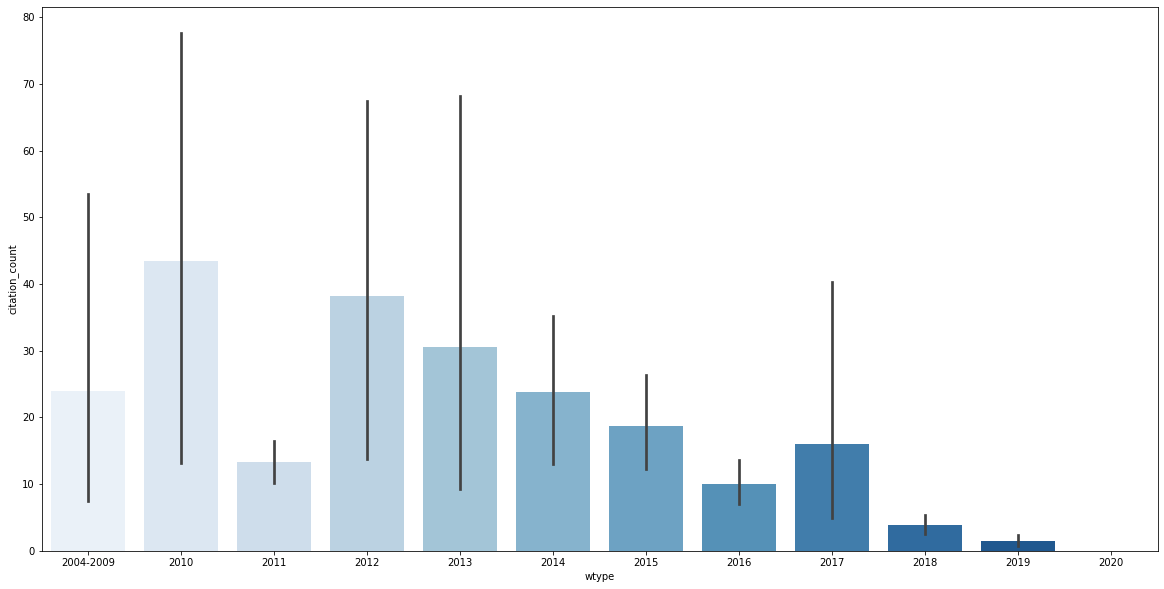

In [19]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x="wtype",y='citation_count', data=cr_df, order=['2004-2009','2010', '2011', '2012', '2013', '2014', 
                                              '2015', '2016', '2017', '2018', '2019', '2020'], palette='Blues')

,ID,DOI,Paper,Country,Comparison,Robot vs human/screen/alternative,Robot/s used (?),Design,Cognitive/Affective,Reported effect size,...,Coded by,Curriculum,Location,Context\n,nb students per robot,Communicative gestures vs functional actions,Autonomy,Contain Retain component?,Material,Updated by
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,(M) Manual (T) Teleoperation (AssT)Assisted Te...,NaN,NaN,NaN
1,1.0,10.1007/978-3-642-34103-8_41,"Abildgaard JR, Scharfe H (2012)",Denmark,male vs female perception,NaN,Geminoid-DK,"1 condition, 2 groups, between subjects",affective (robot perception),not reported,...,JK,HCI,university,University classroom,150.0,CO,T,NaN,Laptop,WJ
2,2.0,10.1142/S0219843614500224,"Alemi M, Meghdari A, Ghazisaedy M (2014)",Iran,robot + human vs just human,robot vs human,Nao,between subjects,cognitive (learning),0.3 (eta squared),...,JK,L2,school,junior High,15.0,CO,Scripted,NaN,-,WJ
3,3.0,10.1109/ICRoM.2014.6990994,"Alemi M, Meghdari A, Basiri NM, Taheri A (2015)",Iran,pre vs mid vs post vs delayed post test of lea...,NaN,Nao,no condition comparison,cognitive (learning),not reported,...,JK,L2,school,junior High,15.0,CO,Scripted,NaN,-,WJ
4,4.0,10.1007/s12369-015-0286-y,"Alemi M, Meghdari A, Ghazisaedy M (2015)",Iran,robot + human vs just human,robot vs human,Nao,"2 conditions, between subjects",affective (anxiety),not reported,...,JK,L2,school,junior High,15.0,CO,Scripted,NaN,-,WJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,110.0,10.1007/978-3-319-42975-5_23,"de Haas, Smeekens, Njeri, Haselager, et al (2016)",Netherlands,levels of socially complex robot interactions ...,NaN,Nao,"4 conditions, between subjects",affective (emotion),NaN,...,EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,NaN,NaN,NaN,NaN,levels of socially complex robot interactions ...,NaN,Nao,"4 conditions, between subjects",affective (arousal),NaN,...,EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308,111.0,10.1109/MRA.2016.2546700,"Lemaignan, Jacq, Hood, Garcia, Paiva, Dillenbo...",Switzerland,no robot manipulation,NaN,Nao,no condition comparison,NaN,NaN,...,EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309,112.0,10.1109/CEC.2016.7743956,"Suzuki, Yamada, Kanoh (2016)",Japan,nodding+hinting robot vs hinting only robot vs...,NaN,ifbot,2 conditions (but includes previous study data...,cognitive (task completion),NaN,...,EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
anno.dropna(subset=['DOI'], inplace=True)
anno.reset_index(inplace=True)

In [25]:
anno

,index,ID,DOI,Paper,Country,Comparison,Robot vs human/screen/alternative,Robot/s used (?),Design,Cognitive/Affective,...,Coded by,Curriculum,Location,Context\n,nb students per robot,Communicative gestures vs functional actions,Autonomy,Contain Retain component?,Material,Updated by
0,1,1.0,10.1007/978-3-642-34103-8_41,"Abildgaard JR, Scharfe H (2012)",Denmark,male vs female perception,NaN,Geminoid-DK,"1 condition, 2 groups, between subjects",affective (robot perception),...,JK,HCI,university,University classroom,150.0,CO,T,NaN,Laptop,WJ
1,2,2.0,10.1142/S0219843614500224,"Alemi M, Meghdari A, Ghazisaedy M (2014)",Iran,robot + human vs just human,robot vs human,Nao,between subjects,cognitive (learning),...,JK,L2,school,junior High,15.0,CO,Scripted,NaN,-,WJ
2,3,3.0,10.1109/ICRoM.2014.6990994,"Alemi M, Meghdari A, Basiri NM, Taheri A (2015)",Iran,pre vs mid vs post vs delayed post test of lea...,NaN,Nao,no condition comparison,cognitive (learning),...,JK,L2,school,junior High,15.0,CO,Scripted,NaN,-,WJ
3,4,4.0,10.1007/s12369-015-0286-y,"Alemi M, Meghdari A, Ghazisaedy M (2015)",Iran,robot + human vs just human,robot vs human,Nao,"2 conditions, between subjects",affective (anxiety),...,JK,L2,school,junior High,15.0,CO,Scripted,NaN,-,WJ
4,5,5.0,10.1007/978-3-319-25554-5_3,"Alves-Oliveira P, Ribeiro T, Petisca S, di Tul...",Portugal,expectation vs satisfaction of robot interaction,NaN,Nao,NaN,affective (satisfaction),...,JK,sustainability,school,high school,2.0,CO+Dietic,WOZ,NaN,interactive touch table,WJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,299,107.0,10.2307/jeductechsoci.19.1.337,"Hong, Huang, Hsu, Shen (2016)",Taiwan,robot vs no robot,robot vs alternative,Bioloid,"2 conditions, between subjects",cognitive (overall learning achievement),...,EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,303,108.0,10.1016/j.chb.2016.06.005,"Edwards, Edwards, Spence, Harris, Gambino (2016)",USA,robot-as-teacher vs teacher-as-robot,NaN,MantaroBot Classic,"2 conditions, between subjects",affective (source credibility),...,EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,306,110.0,10.1007/978-3-319-42975-5_23,"de Haas, Smeekens, Njeri, Haselager, et al (2016)",Netherlands,levels of socially complex robot interactions ...,NaN,Nao,"4 conditions, between subjects",affective (emotion),...,EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,308,111.0,10.1109/MRA.2016.2546700,"Lemaignan, Jacq, Hood, Garcia, Paiva, Dillenbo...",Switzerland,no robot manipulation,NaN,Nao,no condition comparison,NaN,...,EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
cr_anno = pd.merge(cr_df, anno, on=['DOI'], how='left')

In [30]:
cr_anno.to_excel('CrossRef_DataFrame_wAnno.xlsx', index=False)

In [31]:
cr_anno.sort_values(by='citation_count').head(10)

,DOI,ISBN,ISSN,URL,abstractNote,accessDate,archive,archiveLocation,author,bookTitle,...,Coded by,Curriculum,Location,Context\n,nb students per robot,Communicative gestures vs functional actions,Autonomy,Contain Retain component?,Material,Updated by
0,10.21125/inted.2020.1926,[9788409179398],2340-1079,http://dx.doi.org/10.21125/inted.2020.1926,We report on a follow-up study of the Co-Write...,2020-03-30T00:08:16Z,,,"[{'given': 'Christia', 'family': 'Ioannou', 's...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,10.1007/978-3-030-06134-0_42,"[9783030061333, 9783030061340]","[1867-8211, 1867-822X]",http://dx.doi.org/10.1007/978-3-030-06134-0_42,Both storytelling and learning by teaching app...,,,,"[{'given': 'Gijs', 'family': 'Verhoeven', 'seq...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,10.1109/devlrn.2018.8761028,[9781538661109],NaN,http://dx.doi.org/10.1109/devlrn.2018.8761028,It has been suggested that some individuals ma...,,,,"[{'given': 'Junko', 'family': 'Kanero', 'seque...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,10.1145/3284432.3284433,[9781450359535],NaN,http://dx.doi.org/10.1145/3284432.3284433,We conducted a study with 25 children to inves...,2020-03-18,,,"[{'given': 'Christopher D.', 'family': 'Wallbr...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,10.1109/colcomcon.2019.8809113,[9781728135038],NaN,http://dx.doi.org/10.1109/colcomcon.2019.8809113,"According to the UNESCO, the sensitive periods...",,,,"[{'given': 'V.', 'family': 'Robles-Bykbaev', '...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,10.1007/978-3-030-35888-4_56,"[9783030358877, 9783030358884]","[0302-9743, 1611-3349]",http://dx.doi.org/10.1007/978-3-030-35888-4_56,We report on the exploratory design and study ...,,,,"[{'given': 'Koen V.', 'family': 'Hindriks', 's...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,10.1007/s12369-019-00609-9,NaN,"[1875-4791, 1875-4805]",http://dx.doi.org/10.1007/s12369-019-00609-9,This paper presents a sign recognition system ...,2020-03-16T06:23:39Z,,,"[{'given': 'Cemal', 'family': 'Gürpınar', 'seq...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,10.1007/978-3-319-78452-6_11,"[9783319784519, 9783319784526]","[2194-5357, 2194-5365]",http://dx.doi.org/10.1007/978-3-319-78452-6_11,"In recent years, social robots are playing a v...",,,,"[{'given': 'Siva Leela Krishna Chand', 'family...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,10.1145/3366422,NaN,[2573-9522],http://dx.doi.org/10.1145/3366422,Social robots are increasingly applied to supp...,2020-03-17T06:24:09Z,,,"[{'given': 'Thorsten', 'family': 'Schodde', 's...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,10.1007/s11370-018-0266-9,NaN,"[1861-2776, 1861-2784]",http://dx.doi.org/10.1007/s11370-018-0266-9,"In this paper, we present a novel dual-robot t...",2020-03-17T22:18:42Z,,,[{'ORCID': 'http://orcid.org/0000-0003-2851-55...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
llllllljnjjji8ixfds